# HW3
## Question 5
### Tim Demetriades
#### Neural Networks
Build a neural network with one hidden layer to predict class labels for Iris plant dataset.

#### 1.  Properly split the data to training and testing set, and report the training, testing accuracy. You can use sigmoid activation function and select any reasonable size of hidden units. Note that for this part, you need to implement the forward/backward function yourself without using the deep learning package. However, you can use the deep learning package, e.g., tensorflow, pytorch, matconvnet etc, to compare with your own results.


In [1]:
import numpy as np

# import load_iris function from datasets module
from sklearn.datasets import load_iris

First the data is loaded in.

In [2]:
# save 'bunch' object containing iris dataset and its attributes
iris = load_iris()
print(iris.DESCR)   # print description of the iris dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# print the iris data
print(iris.data.shape)
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [4]:
# print the names of the 4 features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# print ints representing the species of each observation
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Here the data is split into matrices/vectors. X = data, Y = targets.

In [7]:
X = iris.data
Y = iris.target

Since there's no easy way to plot 4D data, let's plot the data as 2 2D plots. The first will show the type of iris given the sepal length and width, and the second will show the type of iris given the petal length and width.

In [8]:
import matplotlib.pyplot as plt

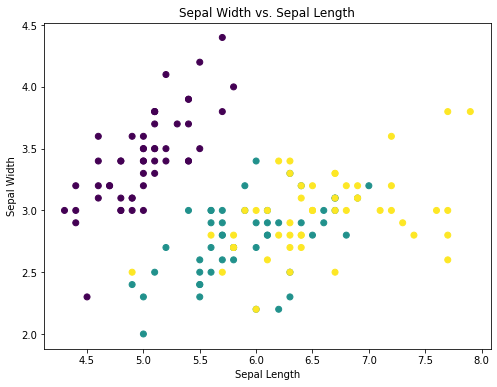

In [9]:
plt.figure(0, figsize=(8,6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs. Sepal Length')
plt.show()

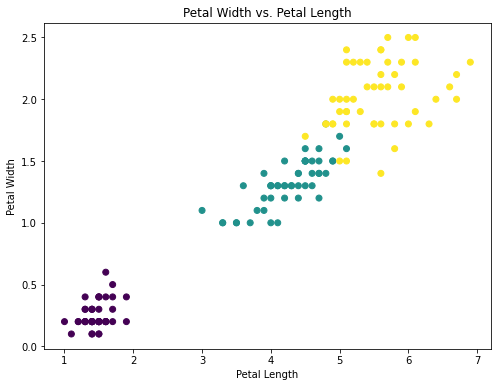

In [10]:
plt.figure(0, figsize=(8,6))
plt.clf()

plt.scatter(X[:, 2], X[:, 3], c=Y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs. Petal Length')
plt.show()

Let's do some pre-processing to the data to get it ready for training.

In [11]:
from sklearn.preprocessing import StandardScaler

First the data is standardized to give it a mean of 0 and standard deviation of 1.

In [12]:
# Standardize input data by remoivng the mean and scaling to unit variance
# Mean = 0, Standard Deviation = 1
StandardScaler = StandardScaler()
X = StandardScaler.fit_transform(X)

In [13]:
print(f'Mean of X = {round(np.mean(X))}')
print(f'Standard Deviation of X = {np.std(X)}')

Mean of X = 0
Standard Deviation of X = 1.0


In [14]:
from sklearn.preprocessing import OneHotEncoder

Here the target data is converted to one-hot encoding so that we can use the categorical cross-entropy loss function.

In [15]:
# Convert classes into one hot labels 
Y = Y.reshape(-1, 1)
OneHotEncoder = OneHotEncoder()
OneHotEncoder.fit(Y)
one_hot_labels = OneHotEncoder.transform(Y).toarray()
Y = one_hot_labels

# Could also just do this
# from tensorflow.keras.utils import to_categorical
# Y = to_categorical(Y)

In [16]:
print(Y[0])
print(Y[-1])

[1. 0. 0.]
[0. 0. 1.]


The data is split into training data and testing data.

In [17]:
# Split x and y into training and testing sets
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [19]:
print(len(x_train))
print(len(x_test))

105
45


Below is the loss formula we will use. This formula is able to handle multiple classes that are one-hot encoded.

**Categorical Cross-Entropy Loss**

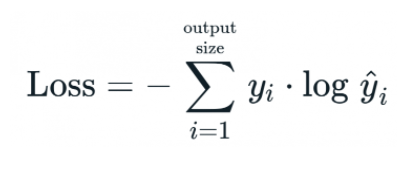

Here is the Neural Network class. It contains all the methods needed to train the classifier.

In [20]:
class Neural_Network():
    def __init__(self, input_size, output_size, hidden_size, iterations, learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate

        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.w1 = np.random.randn(self.input_size, self.hidden_size)   
        self.w2 = np.random.randn(self.hidden_size, self.output_size)
        
        self.train_loss_list = []
        self.train_accuracy_list = []
        
    # Activation functions and derivatives
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def feed_forward(self, x):
        # Input layer to hidden layer
        self.z1 = x @ self.w1    
        self.h1 = self.sigmoid(self.z1)

        # Hidden layer to output layer
        self.z2 = self.h1 @ self.w2        
        self.h2 = self.sigmoid(self.z2)
            
    def back_propagation(self, x, y):
        # d_z2 = (dL/dh2)*(dh2/dz2)
        self.d_z2 = (-y * (1 / self.h2)) * self.sigmoid_derivative(self.h2)

        # d_w2 = (dL/dz2)*(dz2/dw2)
        self.d_w2 = self.h1.T @ self.d_z2                                                                  

        self.d_w2 /= len(x)    # normalize

        # d_z1 = (dL/dh1)*(dh1/dz1) = [(dL/dz2)*(dz2/dh1)]*(dh1/dz1)
        self.d_z1 = (self.d_z2 @ self.w2.T) * self.sigmoid_derivative(self.h1)

        # d_w1 = (dL/dz1)*(dz1/dw1)
        self.d_w1 = x.T @ self.d_z1

        self.d_w1 /= len(x)    # normalize

        # Adjust weights
        self.w1 = self.w1 - self.learning_rate * self.d_w1
        self.w2 = self.w2 - self.learning_rate * self.d_w2
        
    # Calculate categorical cross-entropy loss
    def calculate_loss(self, y):
        loss = -1 * np.sum(y * np.log(self.h2))
        return loss
        
    def calculate_accuracy(self, y):
        accuracy = np.mean(np.equal(np.argmax(y, axis=-1), np.argmax(iris_classifier.h2, axis=-1)))
        return accuracy
        
    # Takes training data and updates weights using back propagation
    def train(self, x, y):
        for iter in range(self.iterations):
            self.feed_forward(x)
            
            self.train_loss = self.calculate_loss(y)
            self.train_accuracy = self.calculate_accuracy(y)
            self.train_loss_list.append(self.train_loss)
            self.train_accuracy_list.append(self.train_accuracy)
            
            self.back_propagation(x, y)
            
    # Takes testing data to give testing loss and accuracy
    def predict(self, x, y):
        self.feed_forward(x)
        
        self.test_loss = self.calculate_loss(y)
        self.test_accuracy = self.calculate_accuracy(y)

Here we create the iris classifier using the Neural Network class.

In [21]:
iris_classifier = Neural_Network(input_size = X.shape[1],
                                 output_size = len(iris.target_names),
                                 hidden_size = 25,
                                 iterations = 1000,
                                 learning_rate = 0.01)

The classifier is trained using the training data.

In [22]:
iris_classifier.train(x_train, y_train)

Below we plot the training loss and accuracy.

<function matplotlib.pyplot.show(close=None, block=None)>

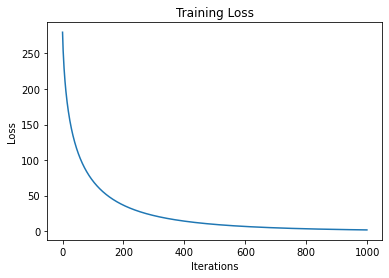

In [23]:
plt.plot(iris_classifier.train_loss_list)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

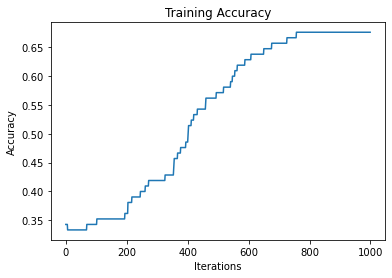

In [24]:
plt.plot(iris_classifier.train_accuracy_list)
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show

As expected, the training loss decreasing over time and the training accuracy increases over time.

Now let's get the testing loss and accuracy to see how well the network handles new data.

In [25]:
# Get loss and accuracy of network using test data
iris_classifier.predict(x_test, y_test)

In [26]:
print(f'Training Loss: {iris_classifier.train_loss:.4f}')
print(f'Training Accuracy: {iris_classifier.train_accuracy:.2%}')
print(f'Testing Loss: {iris_classifier.test_loss:.4f}')
print(f'Testing Accuracy: {iris_classifier.test_accuracy:.2%}')

Training Loss: 1.7181
Training Accuracy: 67.62%
Testing Loss: 0.6721
Testing Accuracy: 64.44%


**Results**

Above you can see the loss and accuracies our neural network obtains. We obtain a great training loss with the model and an even better training accuracy given the current configuration (number of hidden neurons, number of iterations, learning rate). We also obtain great testing loss and accuracy. 

In the next part we'll use keras to create our neural network and train different configurations, such as using different optimizers and adjusting the number of hidden neurons.

#### (2) Try different design of the neural network, compare with part (1), and report findings. This is an open-ended question, you can change the previous model in several ways, e.g., (1) change the activation function to be tanh, ReLU etc, or (2) try to build more complex neural network by introducing more layers, or many other options. Note that for this part, you are allowed to use deep learning packages.

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import models

First, let's try **different optimizers** while keeping everything else constant. We will try the following optimizers:
- **Stochastic Gradient Descent** - gradient descent with momentum (momentum helps reduce impact of noise).
- **RMSprop** - maintain moving average of square of gradients and divide gradient by root of this average.
- **Adam** - SGD method based on adaptive estimation of first-order and second-order moments (combines best parts of Adagrad and RMSprop).
- **Adadelta** - SGD method based on adaptive learning rate per dimension.
- **Adagrad** - optimizer with parameter-specific learning rates that are adapted relative to how frequently a parameter gets updated.
- **Adamax** - varient of Adam based on the infinity norm.

We will use one hidden layer for this part, similar to our custom model in part 1. We will also use 512 hidden neurons, a lot more than the 20 our custom model uses.

In [28]:
def create_model_given_optimizer(optimizer):
    model = models.Sequential()
    model.add(layers.Dense(512, activation='sigmoid', input_shape=(4,)))
    model.add(layers.Dense(3, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

In [29]:
val_accuracy_dict = {}
val_accuracy_dict['SGD'] = create_model_given_optimizer('sgd')
val_accuracy_dict['RMSprop'] = create_model_given_optimizer('rmsprop')
val_accuracy_dict['Adam'] = create_model_given_optimizer('adam')
val_accuracy_dict['Adadelta'] = create_model_given_optimizer('adadelta')
val_accuracy_dict['Adagrad'] = create_model_given_optimizer('adagrad')
val_accuracy_dict['Adamax'] = create_model_given_optimizer('adamax')

In [30]:
def print_accuracy(optimizer, accuracy):
    print(f'Accuracy for {optimizer} = {accuracy:.2f}')

In [31]:
print_accuracy('SGD', val_accuracy_dict['SGD'])
print_accuracy('RMSprop', val_accuracy_dict['RMSprop'])
print_accuracy('Adam', val_accuracy_dict['Adam'])
print_accuracy('Adadelta', val_accuracy_dict['Adadelta'])
print_accuracy('Adagrad', val_accuracy_dict['Adagrad'])
print_accuracy('Adamax', val_accuracy_dict['Adamax'])

Accuracy for SGD = 0.64
Accuracy for RMSprop = 0.82
Accuracy for Adam = 0.76
Accuracy for Adadelta = 0.36
Accuracy for Adagrad = 0.64
Accuracy for Adamax = 0.91


<function matplotlib.pyplot.show(close=None, block=None)>

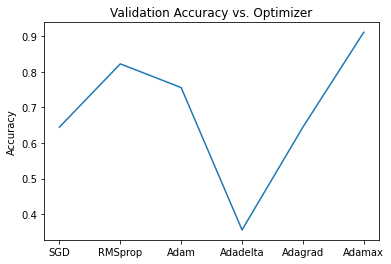

In [32]:
plt.plot(val_accuracy_dict.keys(), val_accuracy_dict.values())
plt.title('Validation Accuracy vs. Optimizer')
plt.ylabel('Accuracy')
plt.show

Above we can see the different validation accuracies for the different optimizers. Clearly, **Adadelta was the worst, achieving only a 36% validation accuracy**. The optimizers with the **highest accuracies were RMSprop, Adam, and Adamax**. This makes sense as Adam is generally the optimizer of choice as it combines the best properties of other good optimizers. As for **Adamax, which performed the best with an accuracy of 91%**, this is also expected as it is based on the Adam optimizer and in some cases can be superior to it.

Next, let's take the best optimizer from the previous part, Adamax, and this time adjust the **number of neurons**. We will still use one hidden layer.

In [33]:
def create_model_given_neurons(neurons):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='sigmoid', input_shape=(4,)))
    model.add(layers.Dense(3, activation='sigmoid'))
    model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

In [34]:
# Create list of neurons from 2 to 512 doubling for each increment
neuron_list = []
i = 2
while (i <= 512):
    neuron_list.append(i)
    print(i)
    i = i * 2

2
4
8
16
32
64
128
256
512


In [35]:
val_accuracy_dict = {}
for neurons in neuron_list:
    val_accuracy_dict[neurons] = create_model_given_neurons(neurons)

In [36]:
val_accuracy_dict

{2: 0.31111112236976624,
 4: 0.35555556416511536,
 8: 0.6222222447395325,
 16: 0.4000000059604645,
 32: 0.46666666865348816,
 64: 0.800000011920929,
 128: 0.8222222328186035,
 256: 0.8888888955116272,
 512: 0.8888888955116272}

<function matplotlib.pyplot.show(close=None, block=None)>

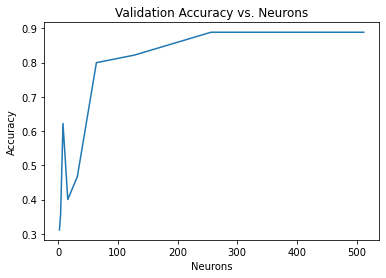

In [37]:
plt.plot(val_accuracy_dict.keys(), val_accuracy_dict.values())
plt.title('Validation Accuracy vs. Neurons')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show

As can be seen in the graph above, **as the number of neurons increases, the accuracy increases**. This makes sense, as more neurons allow the model to learn the features of the data better. There is a tradeoff, though, as you do not want to have too many neurons and make the model too complicated. Based on our results, a good number of neurons seems to be **256 neurons which gave an accuracy of around 89%**.

Lastly, let's try using the best optimizer and best number of neurons from the previous and now adjust the **number of hidden layers**.

In [38]:
def create_model_given_activation(activation_function):
    model = models.Sequential()
    model.add(layers.Dense(512, activation=activation_function, input_shape=(4,)))
    model.add(layers.Dense(3, activation=activation_function))
    model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=20,
                        validation_data=(x_test, y_test),
                        verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

In [39]:
val_accuracy_dict = {}
val_accuracy_dict['sigmoid'] = create_model_given_activation('sigmoid')
val_accuracy_dict['relu'] = create_model_given_activation('relu')
val_accuracy_dict['tanh'] = create_model_given_activation('tanh')
val_accuracy_dict['softmax'] = create_model_given_activation('softmax')
val_accuracy_dict['linear'] = create_model_given_activation('linear')

In [40]:
val_accuracy_dict

{'sigmoid': 0.800000011920929,
 'relu': 0.3333333432674408,
 'tanh': 0.7555555701255798,
 'softmax': 0.644444465637207,
 'linear': 0.31111112236976624}

<function matplotlib.pyplot.show(close=None, block=None)>

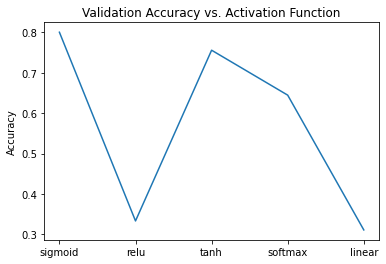

In [41]:
plt.plot(val_accuracy_dict.keys(), val_accuracy_dict.values())
plt.title('Validation Accuracy vs. Activation Function')
plt.ylabel('Accuracy')
plt.show

From the above graph we can see that the activation function we have been using, **sigmoid, actually turns out to perform the best**. On the other hand, **relu and linear appear to give the lowest validation accuracy**.

Overall, from the above tests we can see that the model that performed best used the **Adamax optimizer**, **256 hidden neurons**, and **sigmoid activation function**. The highest accuracy we achived was an **accuracy of 91%**. This is considerably higher than the **accuracy of our custom neural network of around 65%.** This is expected, of course, as our neural network was much simpler and used a much more basic method of optimization.